In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
!pip install ucimlrepo

In [23]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = pd.DataFrame(mushroom.data.features)
y = pd.DataFrame(mushroom.data.targets )

plt.style.use('ggplot')
sns.set(style="whitegrid")

X.head()



,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [24]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [27]:
print(X.isnull().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [28]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).

# Crear listas vacías para almacenar los nombres de las características y sus valores únicos
features = []
n_values = []

for column in X.columns:
    features.append(column)# Añadir el nombre de la columna a la lista de características
    n_values.append(len(X[column].unique()))# Añadir el número de valores únicos a la lista de n_values

# Crear un nuevo dataframe con las dos listas
df_unique_values = pd.DataFrame({
    'features': features,
    'n_values': n_values
})

print(df_unique_values)

                    features  n_values
0                  cap-shape         6
1                cap-surface         4
2                  cap-color        10
3                    bruises         2
4                       odor         9
5            gill-attachment         2
6               gill-spacing         2
7                  gill-size         2
8                 gill-color        12
9                stalk-shape         2
10                stalk-root         5
11  stalk-surface-above-ring         4
12  stalk-surface-below-ring         4
13    stalk-color-above-ring         9
14    stalk-color-below-ring         9
15                 veil-type         1
16                veil-color         4
17               ring-number         3
18                 ring-type         5
19         spore-print-color         9
20                population         6
21                   habitat         7


#### Tratar aquellos valores que entendamos que sean nulos

In [29]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.
X_imputado = X.copy()

print("Número de valores nulos en 'stalk-root' antes de la imputación:")
print(X_imputado['stalk-root'].isnull().sum())

# Reemplazar los valores nulos con "m"
X_imputado['stalk-root'] = X_imputado['stalk-root'].fillna('m')

# Verificar que no quedan valores nulos después de la imputación
print("\nNúmero de valores nulos en 'stalk-root' después de la imputación:")
print(X_imputado['stalk-root'].isnull().sum())

Número de valores nulos en 'stalk-root' antes de la imputación:
2480

Número de valores nulos en 'stalk-root' después de la imputación:
0


#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [30]:
# Mirar cuántos valores únicos hay en cada feature y eliminar las que no aportan información

# Observamos que 'veil-type' solo tiene 1 valor único, por lo que no aporta información discriminante
print("Valores únicos en 'veil-type':", X_imputado['veil-type'].unique())

# Eliminar la columna 'veil-type' ya que no aporta información (solo tiene un valor único)
X_sin_veil_type = X_imputado.drop(columns=['veil-type'])

# Verificar la eliminación
print("\nColumnas después de eliminar 'veil-type':")
print(X_sin_veil_type.columns.tolist())
print("\nNúmero de columnas:", len(X_sin_veil_type.columns))

X_procesado = X_sin_veil_type.copy()

Valores únicos en 'veil-type': ['p']

Columnas después de eliminar 'veil-type':
['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Número de columnas: 21


#### Separar entre variables predictoras y variables a predecir

In [34]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [36]:
X_procesado.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


#### Codificar correctamente las variables categóricas a numéricas

In [38]:
# One Hot Encoder (una linea).
from sklearn.preprocessing import OneHotEncoder

X_Encoded = pd.get_dummies(X, drop_first=True)

# Verificar la forma del nuevo array
print(f"Forma original de X_procesado: {X_procesado.shape}")
print(f"Forma después de codificación: {X_Encoded.shape}")

Forma original de X_procesado: (8124, 21)
Forma después de codificación: (8124, 95)


#### Train test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, test_size=0.33, random_state=42)

## PCA

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


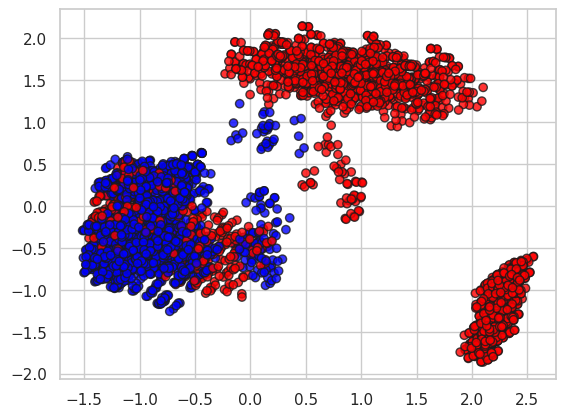

In [47]:
X_Encoded = pd.get_dummies(mushroom.data.features , drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, test_size=0.33, random_state=42)
pca = PCA(n_components=2)       # metodo de sklearn
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
# Representar en un scatterplot y poner en color las etiquetas de entrenamiento
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
color_map = {'p': 'blue', 'e': 'red'}
colors = ['blue' if label == 0 else 'red' for label in y_train_encoded]
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=colors, alpha=0.8, edgecolors='k')

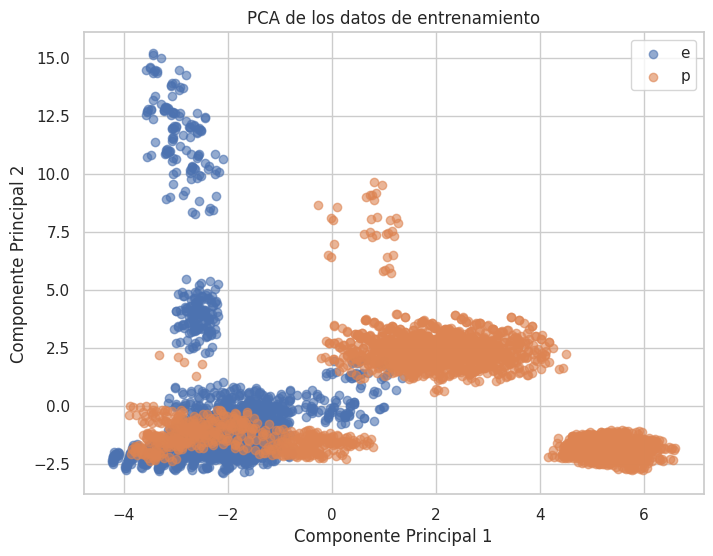

In [43]:
# Escalado previo (obligatorio para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
# Aplicar PCA
pca = PCA(n_components=2)      # Reducimos a 2 componentes para graficar
X_pca = pca.fit_transform(X_scaled)
# Convertir a DataFrame para visualización
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y_train['poisonous'].values # Change made here
# Graficar
plt.figure(figsize=(8,6))
for label in pca_df['label'].unique():
    plt.scatter(
        pca_df[pca_df['label'] == label]['PC1'],
        pca_df[pca_df['label'] == label]['PC2'],
        label=label,
        alpha=0.6
    )
plt.title('PCA de los datos de entrenamiento')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)


Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [44]:
from sklearn.ensemble import RandomForestClassifier

# 1. Definir el clasificador y el número de estimadores
n_estimators = 100  # Puedes ajustar este número según sea necesario
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

# 2. Entrenar en train
rf_classifier.fit(X_train, y_train)

# 3. Calcular la precisión sobre test
y_pred = rf_classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:

In [45]:
X_train.shape

(5443, 95)

¿Muchas features no? Vamos a reducir las usando PCA.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

<Axes: >

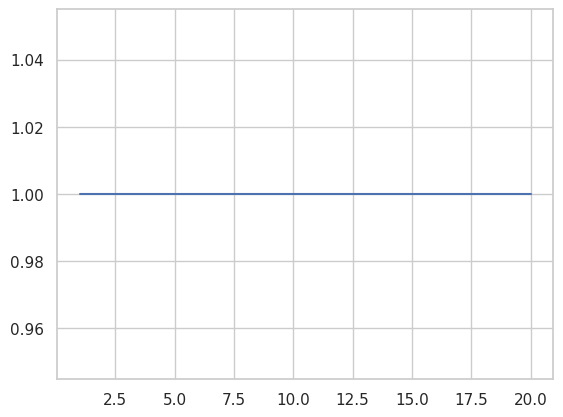

In [46]:
from sklearn.metrics import accuracy_score

n_features = range(1, 21)# definir un rango de valores a probar
scores = []

for n in n_features:

    # Hacer PCA sobre X_train
    # 1. Definir PCA
    pca = PCA(n_components=n)
    # 2. Aprender PCA sobre X_train
    X_train_pca = pca.fit_transform(X_train)

    # Entrenar Random Forest
    # 1. Definir el RF
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # 2. Entrenar clasificador
    rf_classifier.fit(X_train_pca, y_train)

    # Guardar el score
    # Calcular la precisión y guardar el score
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

sns.lineplot(x=n_features, y=scores)

## Clustering

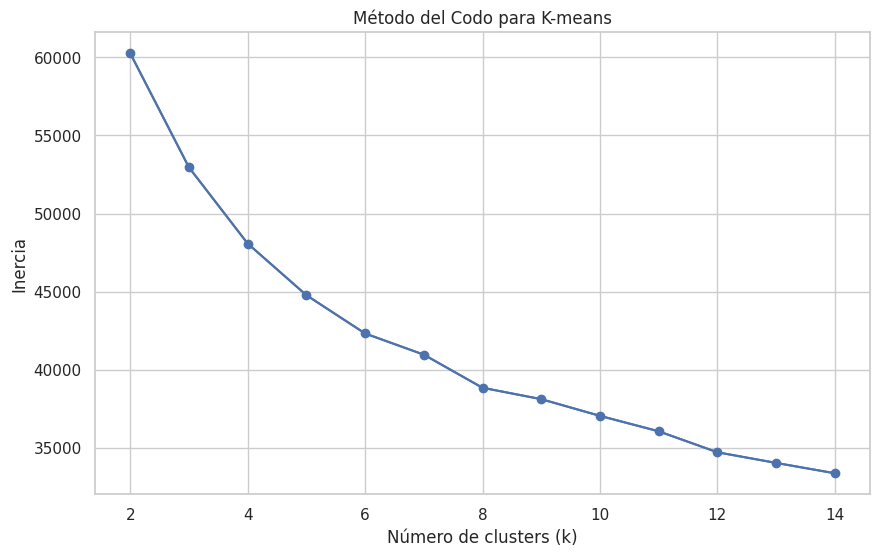

<Axes: >

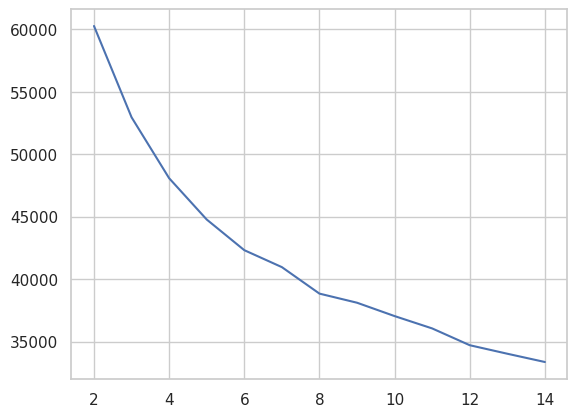

In [48]:
from sklearn.cluster import KMeans

scores = []
k_values = range(2, 15)# definir un rango
for k in k_values:

    # Definir Kmeans y ajustar
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_Encoded)  # Usamos los datos codificados con OneHotEncoder
    # Guardar la inercia (suma de distancias al cuadrado)
    scores.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, 'bo-')
plt.title('Método del Codo para K-means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
sns.lineplot(x=k_values, y=scores)
plt.show()

sns.lineplot(x=k_values, y=scores)

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

<Figure size 1400x800 with 0 Axes>

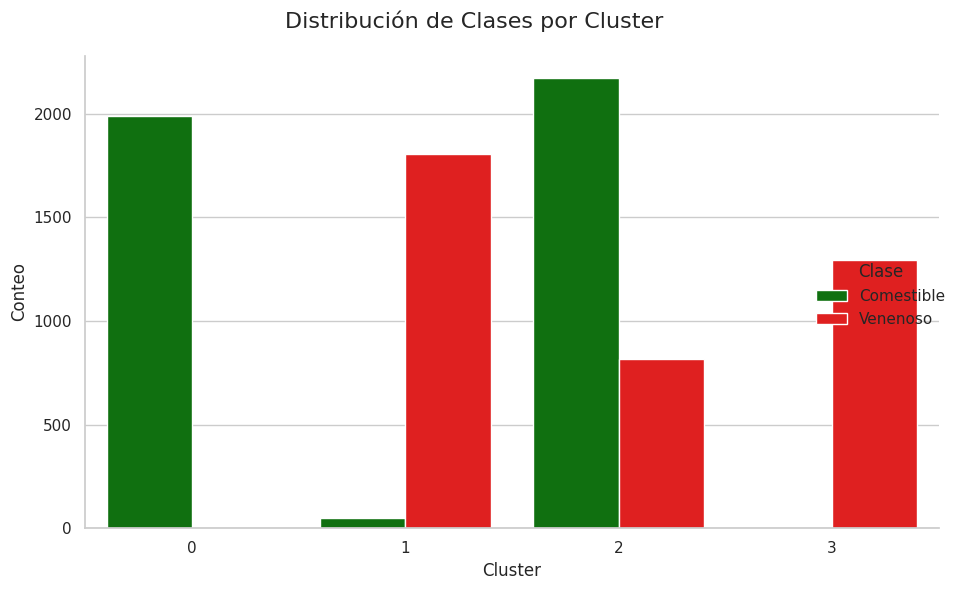

In [50]:
# Aprender Kmeans con el valor de K obtenido.
k_optimo = 4

# Definir y entrenar Kmeans.
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans.fit(X_Encoded)

# Obtener las etiquetas de cluster para cada muestra
cluster_labels = kmeans.labels_
# Preparar el catplot.
df_resultados = pd.DataFrame({
    'Cluster': cluster_labels,
    'Clase': y.values.flatten()
})

plt.figure(figsize=(14, 8))
ax = sns.catplot(
    data=df_resultados,
    x='Cluster',
    hue='Clase',
    kind='count',  # Tipo de gráfico: conteo (similar a countplot)
    palette=['green', 'red'],  # Verde para comestible, rojo para venenoso
    height=6,
    aspect=1.5
)

# Personalizar el gráfico
ax.set_axis_labels("Cluster", "Conteo")
ax.legend.set_title("Clase")
# Renombrar las etiquetas de la leyenda
ax._legend.texts[0].set_text("Comestible")
ax._legend.texts[1].set_text("Venenoso")
ax.fig.suptitle('Distribución de Clases por Cluster', fontsize=16)
plt.tight_layout()
plt.show()

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.


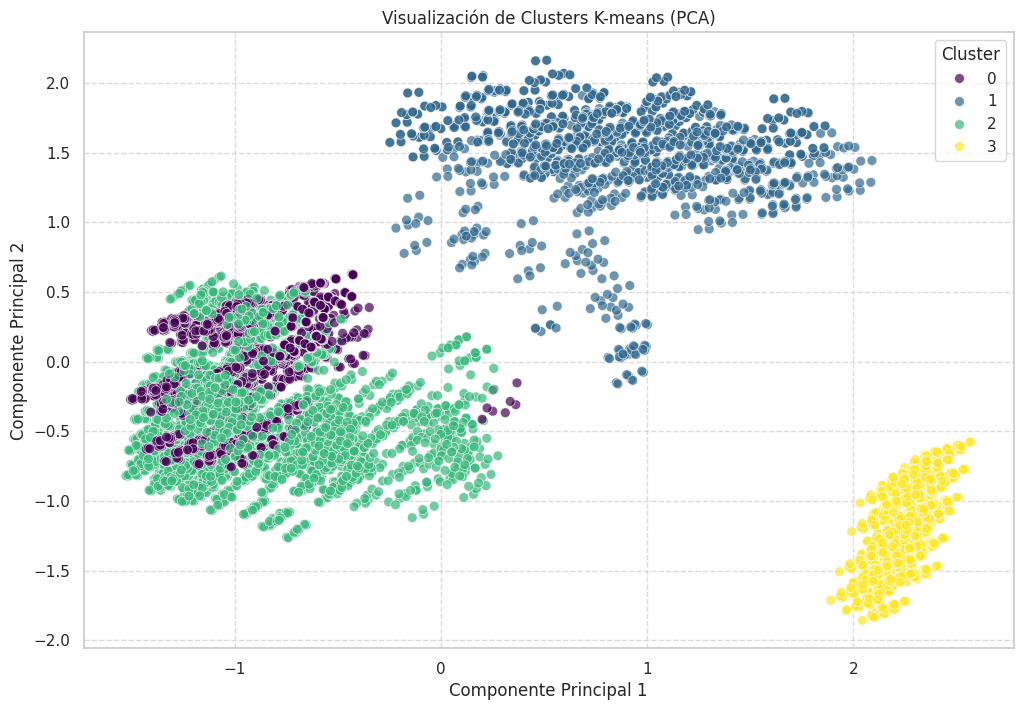

In [52]:

from matplotlib.lines import Line2D
# Entrenar PCA para representar.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Encoded)

# Crear un DataFrame para la visualización
df_viz = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': cluster_labels,
    'Clase': y.values.flatten()
})

# Visualizar clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_viz, palette='viridis', s=50, alpha=0.7)
plt.title('Visualización de Clusters K-means (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()